# Day 12 In Class: Uncertainty and Data Visualization

This notebook should be used in support of your In Class assignment. In the places where there are discussion questions, feel free to record your group's notes within the notebook or elsewhere, as long as your discussions are captured somewhere!

### &#9989;&nbsp; **Question 1** 

Take a few minutes to reflect and take notes on the discussion questions for your Periscope visualization individually, then discuss as a group! (Questions are in the ICA pdf)

[One Angry Bird](https://emotions.periscopic.com/inauguration/)

[Breast Cancer Causes](https://flowingdata.com/2011/09/14/breast-cancer-conversations/)

### &#9989;&nbsp; **Question 2**

In the repository with this assignment, you will find a datafile, `climate_change_data_1900_2005.csv`. The data from 1900-2005 are Global Surface warming temperature data (and uncertainties).

Your first task is to read in the data file and create a plot of only the data from 1900-2005 **without uncertainty.** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# put your code here
cc = pd.read_csv("data_files/climate_change_data_1900_2005.csv")

In [4]:
cc.head()

,Year,Temperature,Uncertainty
0,1900.289017,-0.626263,0.299627
1,1901.445087,-0.656566,0.299746
2,1902.023121,-0.717172,0.305470
3,1902.601156,-0.777778,0.310471
4,1903.468208,-0.848485,0.295873


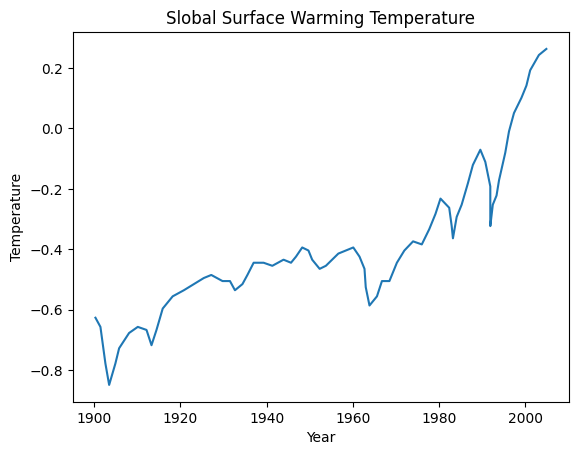

In [7]:
plt.plot(cc["Year"], cc["Temperature"])
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Slobal Surface Warming Temperature")
plt.show()

### &#9989;&nbsp; **Question 3: Reflection**

**Before you move on:** Identify what you want your audience to feel when they are presented with your visualization


### &#9989;&nbsp; **Question 4: Adding Errorbars**

First, using the [pyplot `errorbar()` method](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html), make a plot of data points with included error bars (but NO line connecting the points).  

**Time permitting,** you can make increasingly complex variants on this plot, referring to the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) and [examples](https://matplotlib.org/stable/gallery/statistics/errorbar_features.html) provided for `errorbar()`:


* With constant error for each point (using the standard deviations for
  temperature given in the file)
* With points that are formatted differently from the standard
  value (in terms of point shape and color), and error bars that have
  different colors than the points.
* With large error bar caps (say, 5 points)
* Showing the error on every third point, rather than on every
  point
* With asymmetric errors on each data point, where the "negative
  errors" (i.e., errors on the -x and -y side of each data point) are
  half the size of the "postive errors."  Note: do this using the
  errors provided in the appropriate columns in the file -- you may
  have problems setting asymmetric errors with scalar error bars.
* Try setting some of your error bars as [upper or lower limits](https://matplotlib.org/stable/gallery/statistics/errorbar_limits.html) instead of errors!

In [21]:
plt.fill_between?

Signature:
plt.fill_between(
    x: 'ArrayLike',
    y1: 'ArrayLike | float',
    y2: 'ArrayLike | float' = 0,
    where: 'Sequence[bool] | None' = None,
    interpolate: 'bool' = False,
    step: "Literal['pre', 'post', 'mid'] | None" = None,
    *,
    data=None,
    **kwargs,
) -> 'FillBetweenPolyCollection'
Docstring:
Fill the area between two horizontal curves.

The curves are defined by the points (*x*, *y1*) and (*x*,
*y2*).  This creates one or multiple polygons describing the filled
area.

You may exclude some horizontal sections from filling using *where*.

By default, the edges connect the given points directly.  Use *step*
if the filling should be a step function, i.e. constant in between
*x*.

Parameters
----------
x : array-like
    The x coordinates of the nodes defining the curves.

y1 : array-like or float
    The y coordinates of the nodes defining the first curve.

y2 : array-like or float, default: 0
    The y coordinates of the nodes defining the second curve.

whe

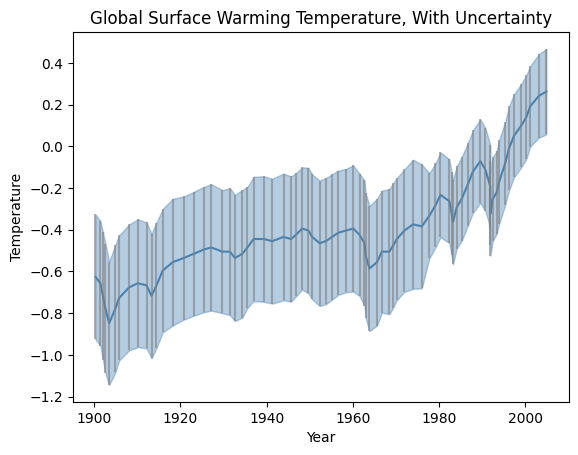

In [25]:
upper = cc["Temperature"] + cc["Uncertainty"]
lower = cc["Temperature"] - cc["Uncertainty"]

plt.plot(cc["Year"], cc["Temperature"], color="steelblue")

plt.fill_between(
    cc["Year"],
    lower,
    upper,
    color="steelblue",
    alpha=0.4,
    label="Uncertainty band"
)

plt.errorbar(
    cc["Year"],
    cc["Temperature"],
    yerr=cc["Uncertainty"],
    fmt="none",
    ecolor="gray",
    alpha=0.6
)

plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Global Surface Warming Temperature, With Uncertainty")
plt.show()

### &#9989;&nbsp; **Question 5: Making a Fan Chart**

Beginning with the line plot from Stage 1, choose one of the four future models. Each model file (which are named `*_all_models.csv`; where "*" is the model number) contains the output of 200 runs of a model for surface temperature warming. The data is based on real simulations from [this work](https://www.nature.com/articles/nclimate1716). The first column of the file contains the year being predicted, and each of the 200 additional columns is the prediction from an individual run of each model, with temperature values in degrees Celsius. Plot the percentile ranges for these models in the manner shown in
the upper right panel of Cairo's Figure 11.13 (i.e. a [fan chart](https://en.wikipedia.org/wiki/Fan_chart_(time_series))). Show for each year the  median model prediction, boundaries for the  25\% and 75\% quantiles, as well as the the full extent of the data (i.e. the maximum and minimum of all possible values). Some starter code is provided, but you can also start from scratch. You should think about how you might use the pyplot [`fill_between()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) method for this!

In [18]:
# put your code here

# read in your chosen model file

df = pd.read_csv("data_files/model_1_all_models.csv")

# Some starter code for calculating means
# Note: You can use the same idea for pandas quantile!

# Average the rows, eliminating the first two columns, where "df" is the name of your dataframe
df_subset = df.iloc[:,2:]

means = df_subset.mean(axis=1)

# now try visualizing the meadian, the two upper and lower quantiles and the full extent of the data (i.e. max and min) by making plots with fill_between()

In [19]:
df.head()

,Year,Temperature,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,...,run_191,run_192,run_193,run_194,run_195,run_196,run_197,run_198,run_199,run_200
0,2004.913295,0.282828,0.301767,0.172473,0.280278,0.231615,0.381318,0.509552,0.256099,0.113476,...,0.315770,0.240246,0.430212,0.132108,0.447011,0.257307,0.080421,0.125379,0.374080,0.208396
1,2006.647399,0.292929,0.235665,0.408870,0.359982,0.370092,0.348152,0.293042,0.422879,0.263604,...,0.373022,0.367640,0.336975,0.141724,0.192117,0.275335,0.231161,0.344815,0.373735,0.241007
2,2008.092486,0.323232,0.440828,0.304647,0.180732,0.197882,0.296741,0.444963,0.370333,0.344355,...,0.255327,0.184463,0.442777,0.276746,0.381270,0.394697,0.307499,0.159010,0.350965,0.107789
3,2009.537572,0.363636,0.078268,0.631531,0.129158,0.375521,0.311442,0.468372,0.509682,0.399593,...,0.361056,0.421182,0.323191,0.322701,0.405441,0.287017,0.474308,0.417909,0.397587,0.251809
4,2010.982659,0.383838,0.516960,0.517765,0.295098,0.341092,0.500256,0.515626,0.256456,0.227226,...,0.621136,0.342379,0.579635,0.128510,0.328872,0.458657,0.534509,0.423521,0.356801,0.297884


### &#9989;&nbsp; **Question 6: Reflection and Discussion**

Use the following questions to guide your group's discussion:

* How might your audience’s perception change from Stage 1?
* What effect does adding uncertainty have on the audience’s emotion?
* What else could you add to elevate emotion in this plot?


*Take notes here!*

This content created by Rachel Roca and Dr. Rachel Frisbie

&#169; Copyright 2024,  Department of Computational Mathematics, Science and Engineering at Michigan State University.